In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [4]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#Data Cleaning

In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df=df.drop(['area_type','availability','balcony','society'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

since null rows are quite small compared to the size of dataframe

In [9]:
df['bath']=df['bath'].fillna(0)


In [10]:
df1=df.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-12-05a9822d8ca0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df1[df1['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [18]:
df1[~df1['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,0.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,0.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,0.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
def range_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [20]:
df2=df1.copy()
df2['total_sqft']=df2['total_sqft'].apply(range_to_num)
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [22]:
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [23]:
df3=df2.dropna()

In [24]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13257 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13257 non-null  object 
 1   size        13257 non-null  object 
 2   total_sqft  13257 non-null  float64
 3   bath        13257 non-null  float64
 4   price       13257 non-null  float64
 5   bhk         13257 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 725.0+ KB


#Feature Engineering

for outlier detection we created a new column

In [26]:
df4=df3.copy()
df4['price_per_sqft']=df4['price']*100000/ df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
df4['location'].describe()

count          13257
unique          1298
top       Whitefield
freq             537
Name: location, dtype: object

too many unique locations to create dummy columns by oh encoding - dimensonality curse

In [28]:
df4['location']=df4['location'].apply(lambda x: x.strip())
location_stats=df4['location'].value_counts()
location_stats

location
Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

1047

In [30]:
locn_under_10=location_stats[location_stats<=10]
locn_under_10

location
Sadashiva Nagar              10
BTM 1st Stage                10
Nagadevanahalli              10
Sector 1 HSR Layout          10
Basapura                     10
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [31]:
df4['location']=df4['location'].apply(lambda x: 'other' if x in locn_under_10 else x)
df4['location'].nunique()

241

In [32]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


#Outlier Detection and Removal

In [33]:
df4.shape

(13257, 7)

having 8 bedrooms in 600 sqft and all is illogical and considered as outlier

In [34]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12513, 7)

In [36]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

create a sub dfs locationwise and each locations mean and std are calculated in the loop and then the outlying value in each locations set is removed and rest added to output df

u can also do m-3st and m+3st

In [37]:
def remove_pps_outlier(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out


In [38]:
df6=remove_pps_outlier(df5)
df6.shape

(10288, 7)

2 bhk of same sq ft have more price than 3bhk of same sqft

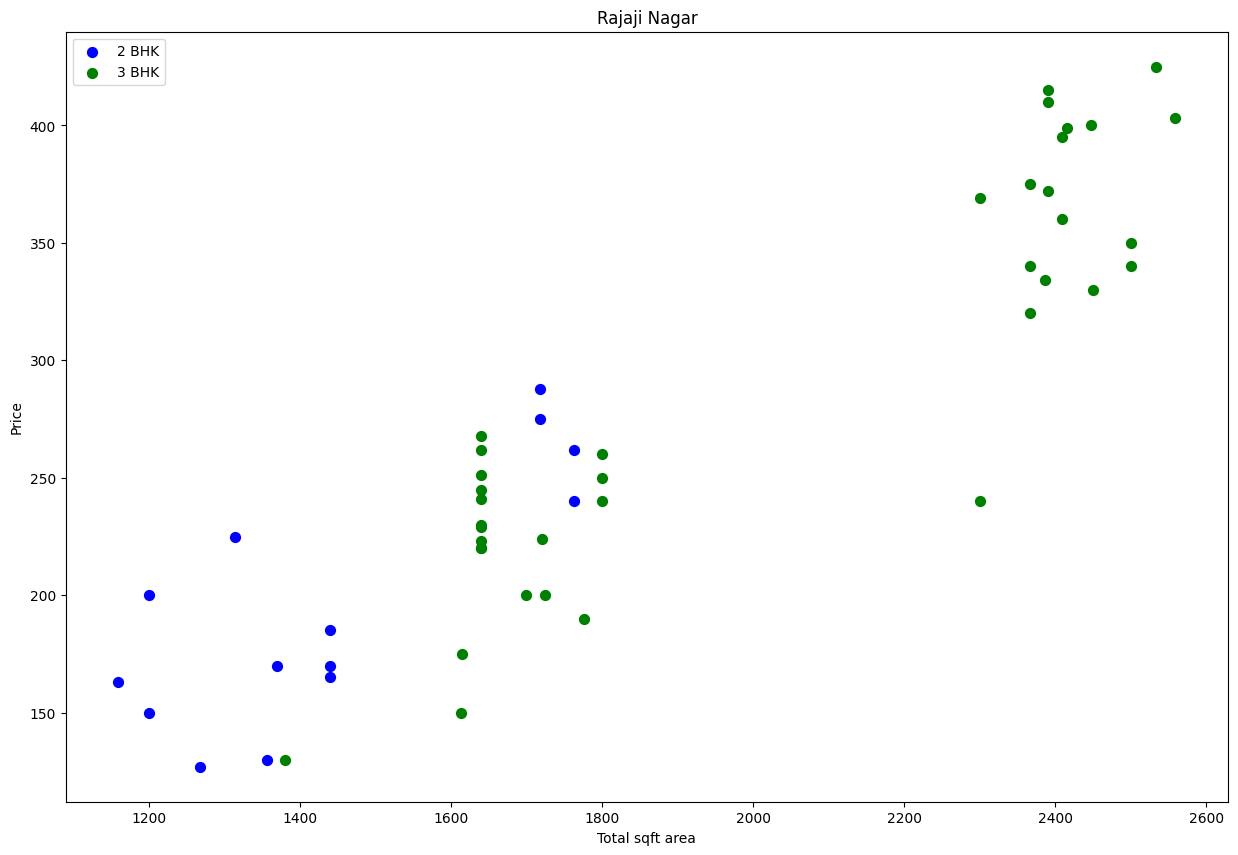

In [39]:
def plot_scatter_chart(df,location):
  bhk2=df[(df.location==location) & (df.bhk==2)]
  bhk3=df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',s=50)
  plt.xlabel("Total sqft area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df6,"Rajaji Nagar")

In [40]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')


In [41]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7342, 7)

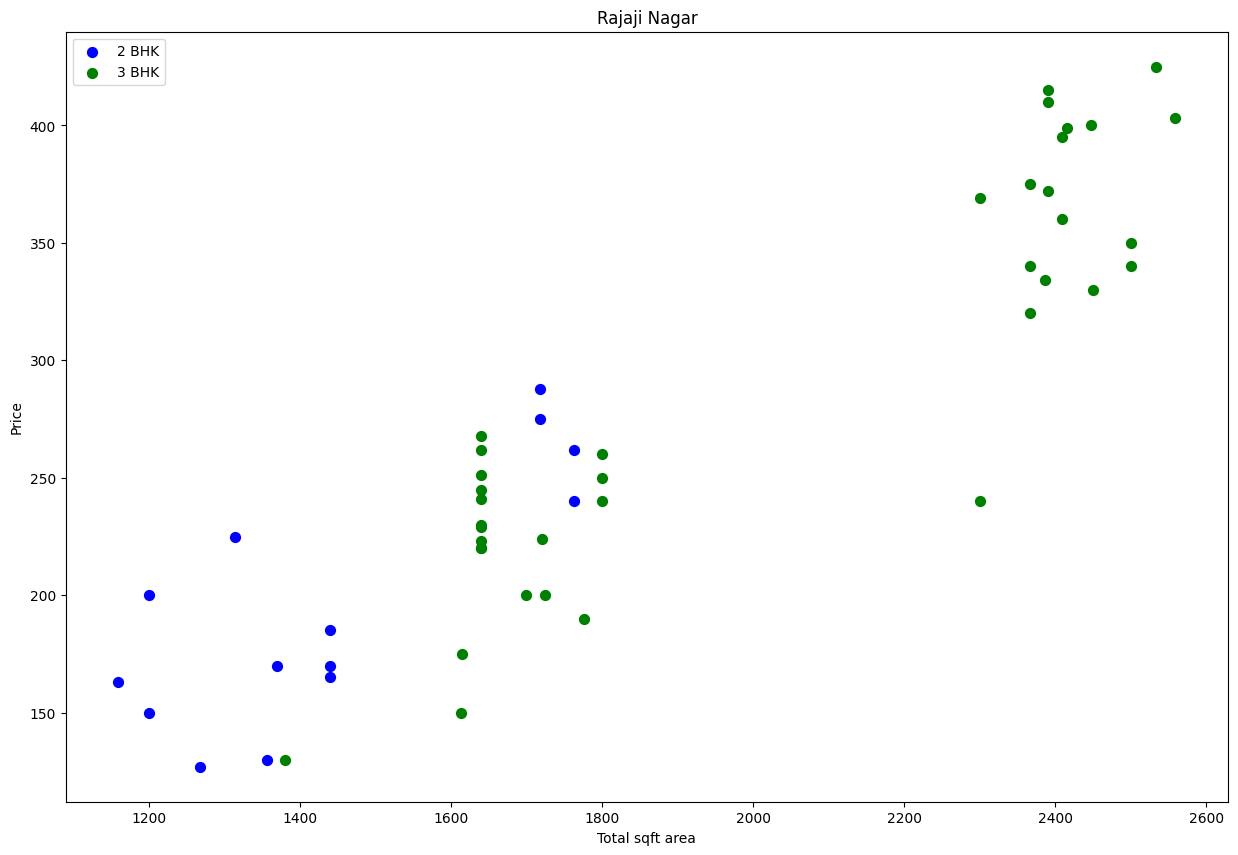

In [42]:
plot_scatter_chart(df6,"Rajaji Nagar")

Text(0, 0.5, 'Count')

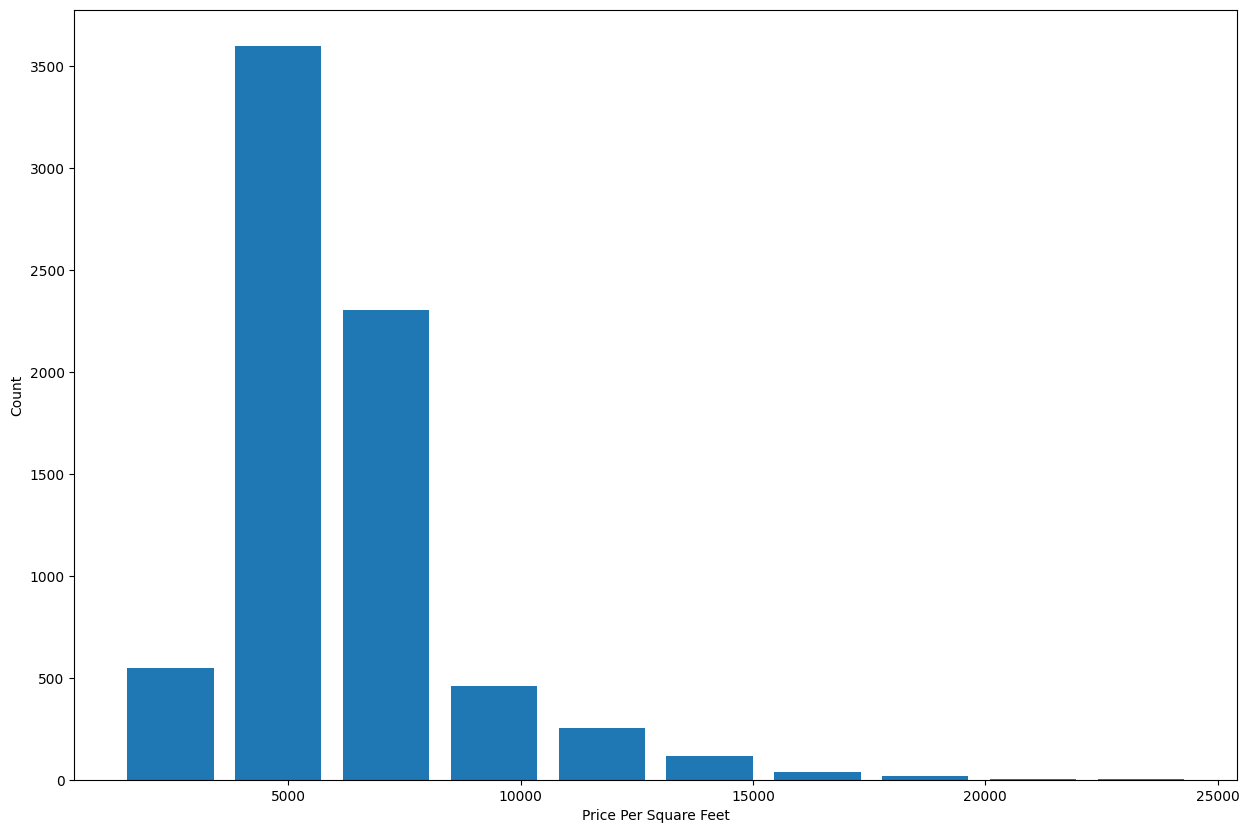

In [43]:
plt.hist(df7.price_per_sqft,rwidth=0.8) #rwidth is width of bar
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [44]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  0.,  7.,  9., 12., 16., 13.])

In [45]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8527,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8616,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9351,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9682,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

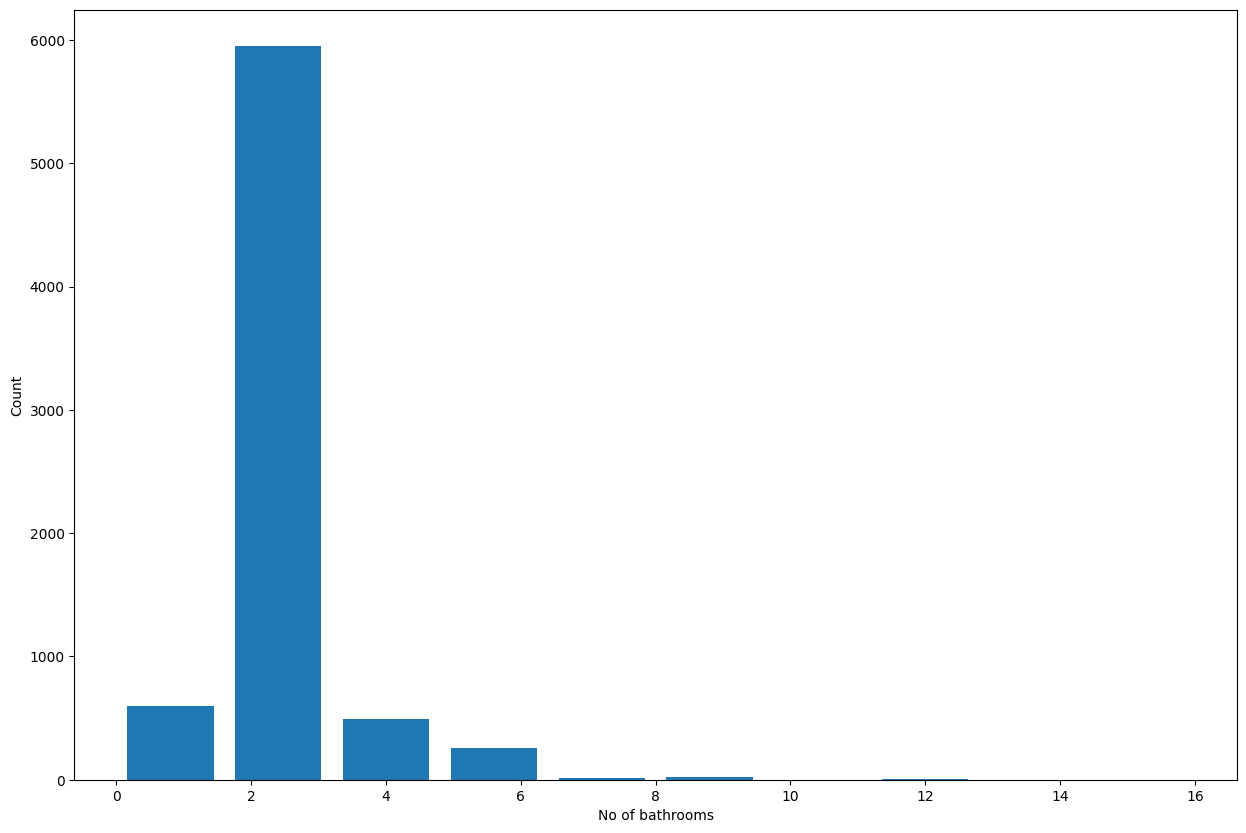

In [46]:
plt.hist(df7.bath,rwidth=0.8) #rwidth is width of bar
plt.xlabel("No of bathrooms")
plt.ylabel("Count")

In [47]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8452,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [48]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(7264, 7)

In [49]:
df8=df8.drop(['size','price_per_sqft'],axis=1)
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


#Model Builidng

In [50]:
dummies=pd.get_dummies(df8.location).astype(int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df9=pd.concat([df8,dummies.drop('other',axis=1)],axis=1)
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df10=df9.drop('location',axis=1)
df10.head(10)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df10.shape

(7264, 244)

In [54]:
X=df10.drop('price',axis=1)
y=df10['price']

In [55]:
from sklearn.preprocessing import StandardScaler
X_scaled=StandardScaler().fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8582062638319233

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.80836135, 0.77204387, 0.84422867, 0.8420371 , 0.82933394])

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_params(X,y):
  algos={
      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          }
      },

      'decision tree':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['friedman_mse','squared_error'],
              'splitter':['best','random']
          }
      }
  }
  scores=[]
  cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for model_name, config in algos.items():
    gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':gs.best_score_,
        'best-params':gs.best_params_
    })
  return pd.DataFrame(scores,columns=['modelname','score','params'])

In [60]:
find_best_params(X_scaled,y)

,modelname,score,params
0,NaN,NaN,NaN
1,NaN,NaN,NaN


In [61]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location)[0][0]  #finding the right column in one hot encoded cases

  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index>=0:
    x[loc_index]=1
  return lr_clf.predict([x])[0]

In [62]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.66896658549878

In [63]:
predict_price('1st Phase JP Nagar',1000,3,3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.58180689432693

In [64]:
predict_price('Indira Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.67993067311647

#Creating Pickle

In [65]:
import pickle
with open('real_estate_price_pred.pickle','wb') as f:
  pickle.dump(lr_clf,f)

export column info in json file

In [66]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))